In [1]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [7]:
df1 = pd.read_csv("/Users/lisajin/Documents/Smnology/CDC_SNOR.csv")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df1).to_numpy()


In [8]:
df1.head()

,strara,NO.,sleeping<7hrs,sleep<7hr_cil,sleep<7hr>cih,snoring,snoring_cil,snoing_cih,unintentionally fell asleep during the day at least 1 day in the preceding 30 days,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cil,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cih,nodded off or fell asleep while driving in the preceding 30 days,nodded off or fell asleep while driving in the preceding 30 days_cil,nodded off or fell asleep while driving in the preceding 30 days_cih
0,total,74571,35.3,34.5,36.1,48.0,47.2,48.8,37.9,37.1,38.7,4.7,4.2,5.1
1,age18-24,2330,30.9,27.8,33.9,25.6,22.7,28.6,43.7,40.4,47.1,4.5,3.0,5.9
2,age25-34,6637,39.4,37.3,41.6,39.6,37.4,41.8,36.1,34.0,38.2,7.2,5.8,8.6
3,age35-44,10645,39.3,37.6,40.5,51.0,49.2,52.7,34.0,32.3,35.6,5.7,4.9,6.6
4,age45-54,15407,39.0,37.6,40.5,59.3,57.8,60.8,35.3,33.8,36.7,3.9,3.3,4.6


In [10]:
df2 = pd.read_csv("/Users/lisajin/Documents/Smnology/CDC_Table.sleepdiff.csv")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df2).to_numpy()


In [11]:
df2.head()

,strata,No.,sleep<7hrs,sleep<7hrs_cil,sleep<7hrs_cih,concentrating,concentrating_cil,concentrating_cih,remembering,remembering_cil,...,working on bobby_lih,driving or taking public trans,driving or taking public trans_cil,driving or taking public trans_cih,taking care of fina,taking care of fin_cil,taking care of fin_cih,performing employed/volunteer work,performing employed/volunteer work_cil,performing employed/volunteer work_cih
0,total,10896,37.1,35.0,39.1,23.2,22.0,24.5,18.2,17.2,...,14.0,11.3,10.5,12.1,10.5,9.6,11.4,8.6,7.9,9.4
1,men,5291,38.9,36.8,41.0,20.2,19.0,21.5,15.0,13.8,...,11.3,9.4,8.4,10.4,10.0,8.8,11.3,7.8,6.9,8.8
2,women,5605,35.3,32.7,37.8,26.1,24.4,27.8,21.4,19.7,...,17.0,13.1,12.0,14.3,11.0,9.8,12.2,9.5,8.5,10.5
3,age20-39,3830,37.0,34.3,39.7,25.1,23.1,27.1,18.4,16.9,...,14.5,12.6,11.3,13.9,10.7,8.8,12.6,10.3,8.8,11.9
4,age40-59,3350,40.3,37.7,42.9,24.5,22.5,26.5,20.3,18.6,...,17.2,12.7,11.1,14.3,13.2,12.0,14.5,10.0,8.7,11.3


In [93]:
#got rid of the total and only look at the segment
df1_new=df1.iloc[1: , :]
df2_new=df2.iloc[1: , :]
df1_sex=df1[df1['strara'].isin(['men','women'])]
df1_age=df1[df1['strara'].isin(['ageage18-24','age25-34','age35-44','age45-54','age55-64','age>=65'])]
df1_education=df1[df1['strara'].isin(['less than high school or GED','high school or GED','some college'])]
df1_race=df1[df1['strara'].isin(['white','black','hispanic','others'])]
df1_marital=df1[df1['strara'].isin(['married','divorced/widowed/separated','never married','member of unmarried couple'])]
df1_work=df1[df1['strara'].isin(['employed','unemployed','retired','unable to work'])]

In [70]:
df1_education

,strara,NO.,sleeping<7hrs,sleep<7hr_cil,sleep<7hr>cih,snoring,snoring_cil,snoing_cih,unintentionally fell asleep during the day at least 1 day in the preceding 30 days,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cil,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cih,nodded off or fell asleep while driving in the preceding 30 days,nodded off or fell asleep while driving in the preceding 30 days_cil,nodded off or fell asleep while driving in the preceding 30 days_cih
18,less than high school or GED,6393,32.0,29.8,34.2,51.2,48.7,53.7,43.4,40.9,45.9,5.4,4.2,6.5
19,high school or GED,20504,37.0,35.4,38.6,49.9,48.3,51.5,39.6,38.1,41.2,4.0,3.4,3.7
20,some college,47426,35.8,34.8,36.8,47.0,46.0,47.9,35.9,34.9,36.9,4.8,4.2,5.4


<AxesSubplot:xlabel='strara'>

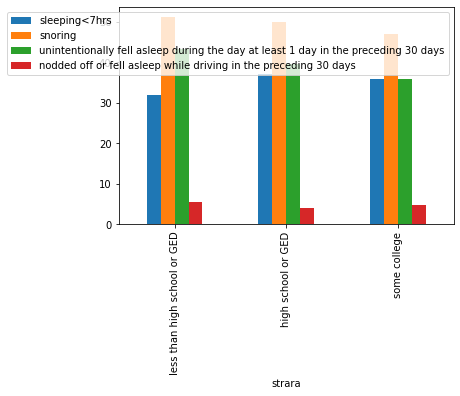

In [71]:
df1_education.plot(kind='bar',x='strara',y=['sleeping<7hrs','snoring','unintentionally fell asleep during the day at least 1 day in the preceding 30 days','nodded off or fell asleep while driving in the preceding 30 days'])

<AxesSubplot:xlabel='strara'>

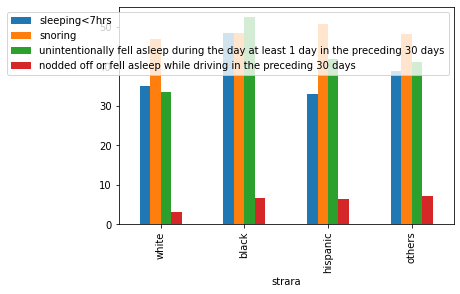

In [72]:
df1_race.plot(kind='bar',x='strara',y=['sleeping<7hrs','snoring','unintentionally fell asleep during the day at least 1 day in the preceding 30 days','nodded off or fell asleep while driving in the preceding 30 days'])

<AxesSubplot:xlabel='strara'>

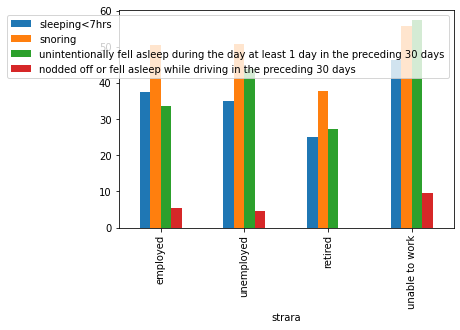

In [73]:
df1_work.plot(kind='bar',x='strara',y=['sleeping<7hrs','snoring','unintentionally fell asleep during the day at least 1 day in the preceding 30 days','nodded off or fell asleep while driving in the preceding 30 days'])

<AxesSubplot:xlabel='strara', ylabel='unintentionally fell asleep during the day at least 1 day in the preceding 30 days'>

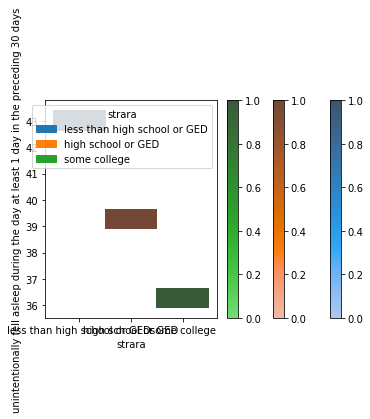

In [74]:
sns.histplot(data=df1_education, x="strara",y='unintentionally fell asleep during the day at least 1 day in the preceding 30 days',
             hue='strara',
             cbar=True,
             bins=10)

<AxesSubplot:xlabel='strata'>

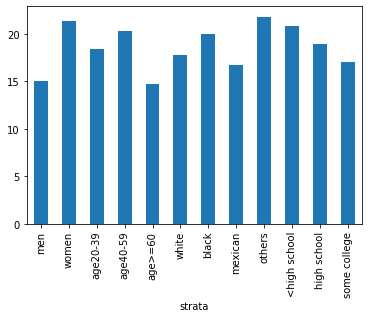

In [64]:
df2_new.set_index('strata')['remembering'].plot.bar()

In [ ]:
sns.histplot(data=df, x="sleep_score_cat",y='income_median',
             hue='Education',
             cbar=True,
             bins=10)

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='snoring'>

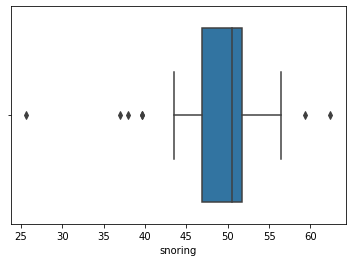

In [32]:
sns.boxplot(df1_new.snoring)

In [33]:
df1_new.snoring.describe()

count    36.000000
mean     48.894444
std       6.706924
min      25.600000
25%      46.950000
50%      50.500000
75%      51.725000
max      62.400000
Name: snoring, dtype: float64

In [79]:
df1_education['snoringmorethan50']=df1_new.snoring>50

<ipython-input-79-8cd8669b4709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_education['snoringmorethan50']=df1_new.snoring>50


<AxesSubplot:xlabel='strara', ylabel='sleeping<7hrs'>

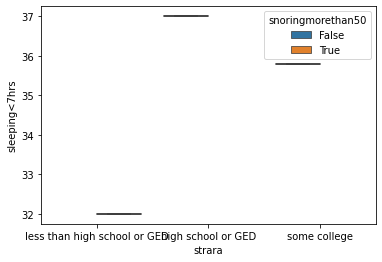

In [80]:
sns.boxplot(x='strara',y='sleeping<7hrs',hue='snoringmorethan50',data=df1_education)

In [81]:
#df1_education.set_index('strara',inplace=True)

In [82]:
df1_education

,NO.,sleeping<7hrs,sleep<7hr_cil,sleep<7hr>cih,snoring,snoring_cil,snoing_cih,unintentionally fell asleep during the day at least 1 day in the preceding 30 days,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cil,unintentionally fell asleep during the day at least 1 day in the preceding 30 days_cih,nodded off or fell asleep while driving in the preceding 30 days,nodded off or fell asleep while driving in the preceding 30 days_cil,nodded off or fell asleep while driving in the preceding 30 days_cih,snoringmorethan50
strara,,,,,,,,,,,,,,
less than high school or GED,6393,32.0,29.8,34.2,51.2,48.7,53.7,43.4,40.9,45.9,5.4,4.2,6.5,True
high school or GED,20504,37.0,35.4,38.6,49.9,48.3,51.5,39.6,38.1,41.2,4.0,3.4,3.7,False
some college,47426,35.8,34.8,36.8,47.0,46.0,47.9,35.9,34.9,36.9,4.8,4.2,5.4,False


In [87]:
df1_education_new=df1_education[['NO.','sleeping<7hrs','snoring']]

In [94]:
education_colors=df1_education.strara.map({
    'less than high school or GED':'blue',
    'high school or GED':'red',
    'some college':'green'
})

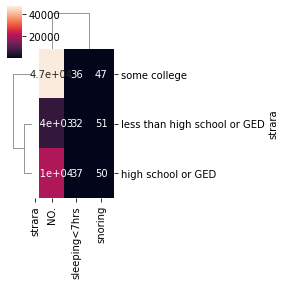

In [95]:
sns.clustermap(df1_education_new,figsize=(4,4),row_colors=education_colors,annot=True)

In [96]:
sns.set_style('dark')

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nodded off or fell asleep while driving in the preceding 30 days', ylabel='sleeping<7hrs'>

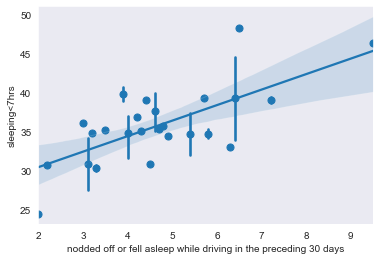

In [102]:
sns.regplot(df1['nodded off or fell asleep while driving in the preceding 30 days'],df1['sleeping<7hrs'],
           x_estimator=np.mean)